# Data Preprocessing

In [1798]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
import warnings
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [1799]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1800]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data Shape

In [1801]:
df.shape 

(768, 9)

### Data Missing Values

In [1802]:
df.isna().sum() #there are no missing values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1803]:
df.isnull().any().sum()

0

### Column types of the dataset



In [1804]:
df.dtypes #check the type of every column in our dataset

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Data categorization

In [1805]:
All = df.shape[0]
diabetes = df[df['Outcome'] == 1]
nondiabetes = df[df['Outcome'] == 0]

x = len(diabetes)/All
y = len(nondiabetes)/All

print('diabetes :',x*100,'%')
print('No diabetes :',y*100,'%')

diabetes : 34.89583333333333 %
No diabetes : 65.10416666666666 %


Text(0, 0.5, 'Frequency')

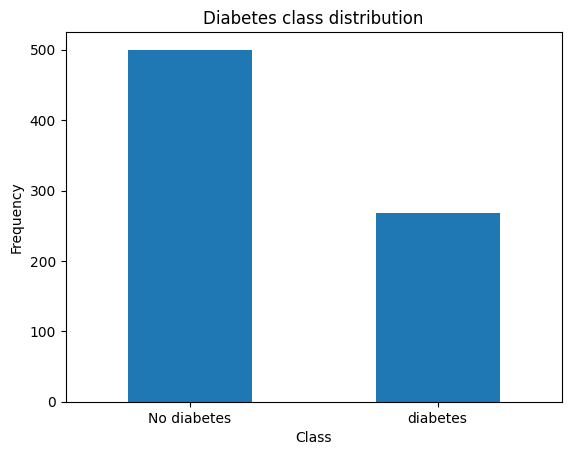

In [1806]:
labels = ['No diabetes','diabetes']

classes = pd.value_counts(df['Outcome'], sort = True)
classes.plot(kind = 'bar', rot=0)

plt.title("Diabetes class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

### Correlation Matrix

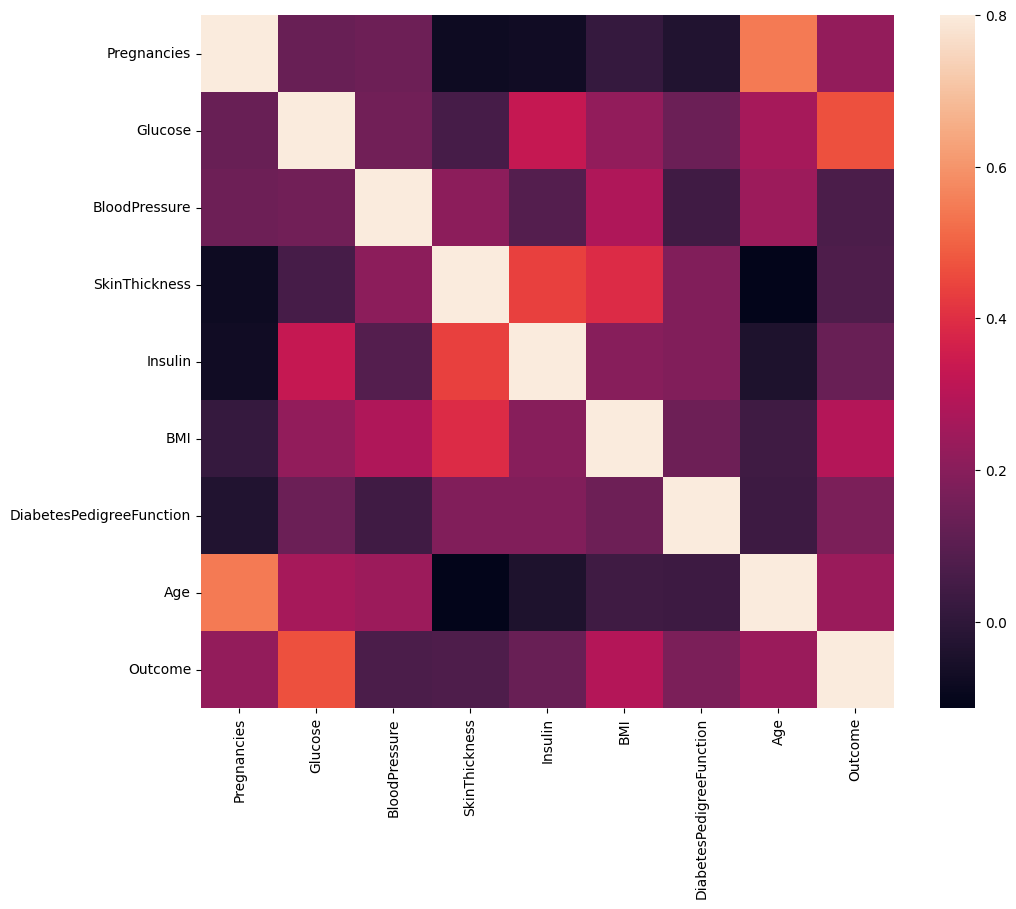

In [1807]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [1808]:
df.drop(['BloodPressure'], axis=1, inplace=True) #drop bloodpressure, as it has low correlation with the outcome
df

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35,0,33.6,0.627,50,1
1,1,85,29,0,26.6,0.351,31,0
2,8,183,0,0,23.3,0.672,32,1
3,1,89,23,94,28.1,0.167,21,0
4,0,137,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171,63,0
764,2,122,27,0,36.8,0.340,27,0
765,5,121,23,112,26.2,0.245,30,0
766,1,126,0,0,30.1,0.349,47,1


### Replace zero values

Here zero values are replaced by the mean of the column based on the column that has the most correlation with the one that zeros will be replaced with.

In [1809]:
#count of 0
count_zero = len(df[df['SkinThickness'] == 0])
count_zero

227

In [1810]:
#replacing 0 with mean values
df['Glucose'] = df.groupby('Outcome')['Glucose'].transform(lambda x: x.replace(0, x.mean()))
df['BMI'] = df.groupby('SkinThickness')['BMI'].transform(lambda x: x.replace(0, x.mean()))
df['SkinThickness'] = df.groupby('Insulin')['SkinThickness'].transform(lambda x: x.replace(0, x.mean()))
df['Insulin'] = df.groupby('SkinThickness')['Insulin'].transform(lambda x: x.replace(0, x.mean()))
df

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,35.000000,138.200000,33.6,0.627,50,1
1,1,85.0,29.000000,150.647059,26.6,0.351,31,0
2,8,183.0,11.508021,0.000000,23.3,0.672,32,1
3,1,89.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,27.000000,104.782609,36.8,0.340,27,0
765,5,121.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,11.508021,0.000000,30.1,0.349,47,1


In [1811]:
#count of 0
count_zero = len(df[df['SkinThickness'] == 0])
count_zero

0

### Plots

<Axes: ylabel='Count'>

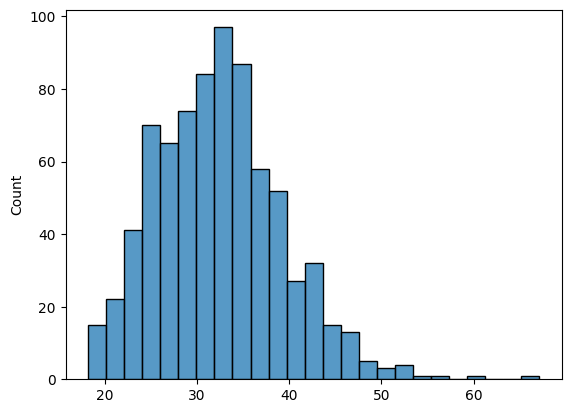

In [1812]:
BMI = df['BMI'].values
sns.histplot(BMI)

<Axes: ylabel='Count'>

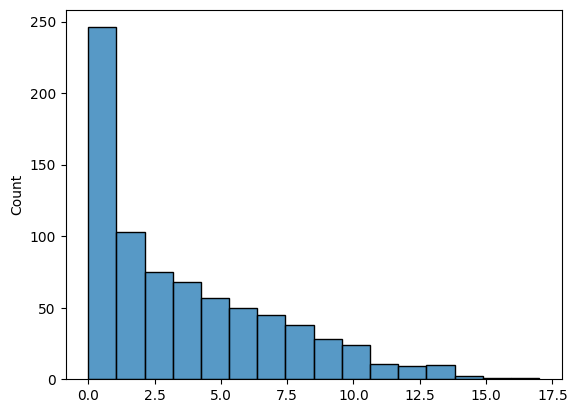

In [1813]:
pregrancies = df['Pregnancies'].values
sns.histplot(pregrancies)

<Axes: ylabel='Count'>

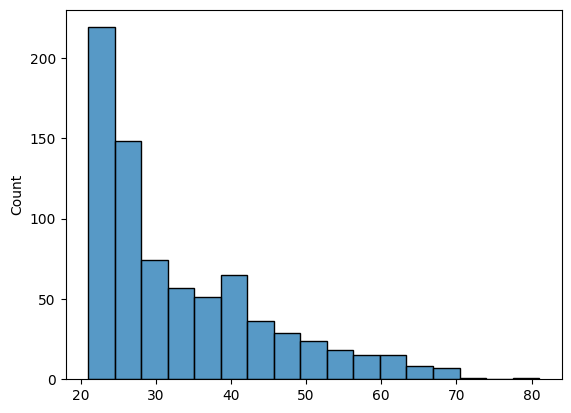

In [1814]:
age = df['Age'].values
sns.histplot(age)

### Normalization

In [1815]:
#normalization for insulin column
old_insulin_column = df['Insulin']
normalizer = Normalizer().fit([old_insulin_column])
df2 = pd.DataFrame(normalizer.transform([old_insulin_column]))
df2 = df2.transpose()

In [1816]:
df['Insulin'] = df2

In [1817]:
#normalization for glucose column
old_glucose_column = df['Glucose']
normalizer = Normalizer().fit([old_glucose_column])
df2 = pd.DataFrame(normalizer.transform([old_glucose_column]))
df2 = df2.transpose()

In [1818]:
df['Glucose'] = df2

In [1819]:
#normalization for skinthickness column
old_skin_column = df['SkinThickness']
normalizer = Normalizer().fit([old_skin_column])
df2 = pd.DataFrame(normalizer.transform([old_skin_column]))
df2 = df2.transpose()

In [1820]:
df['SkinThickness'] = df2

In [1821]:
df

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.042573,0.047231,0.033807,33.6,0.627,50,1
1,1,0.024451,0.039134,0.036852,26.6,0.351,31,0
2,8,0.052642,0.015529,0.000000,23.3,0.672,32,1
3,1,0.025602,0.031037,0.022995,28.1,0.167,21,0
4,0,0.039409,0.047231,0.041097,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,0.029054,0.064774,0.044032,32.9,0.171,63,0
764,2,0.035094,0.036435,0.025632,36.8,0.340,27,0
765,5,0.034807,0.031037,0.027398,26.2,0.245,30,0
766,1,0.036245,0.015529,0.000000,30.1,0.349,47,1


<Axes: ylabel='Count'>

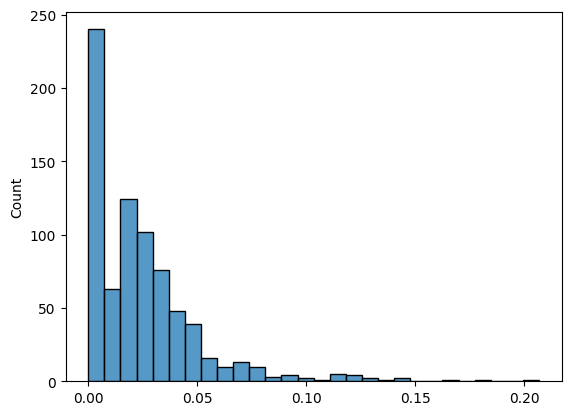

In [1822]:
insulin = df['Insulin'].values
sns.histplot(insulin)

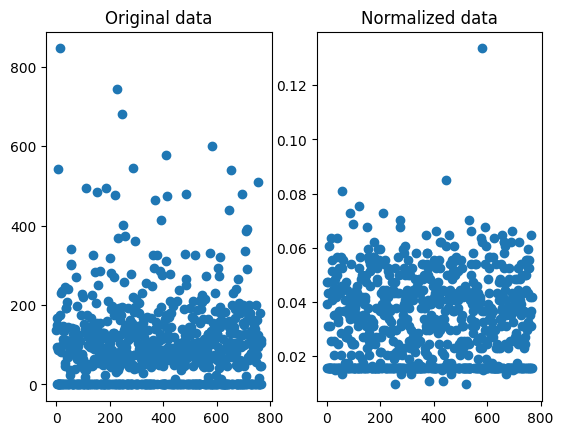

In [1823]:
#insulin normalized and unnormalized data
fig, axes = plt.subplots(1,2)

np_array = np.arange(0, 768)
df_array = pd.DataFrame(np_array)

axes[0].scatter(df_array, old_insulin_column)
axes[0].set_title("Original data")

axes[1].scatter(df_array, df2)
axes[1].set_title("Normalized data")
plt.show()

### Oversample the dataset

In [1824]:
X= df.iloc[:, 0:7]
y = df["Outcome"]
X

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,0.042573,0.047231,0.033807,33.6,0.627,50
1,1,0.024451,0.039134,0.036852,26.6,0.351,31
2,8,0.052642,0.015529,0.000000,23.3,0.672,32
3,1,0.025602,0.031037,0.022995,28.1,0.167,21
4,0,0.039409,0.047231,0.041097,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,0.029054,0.064774,0.044032,32.9,0.171,63
764,2,0.035094,0.036435,0.025632,36.8,0.340,27
765,5,0.034807,0.031037,0.027398,26.2,0.245,30
766,1,0.036245,0.015529,0.000000,30.1,0.349,47


In [1825]:
X, y = SMOTE().fit_resample(X, y)
y

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

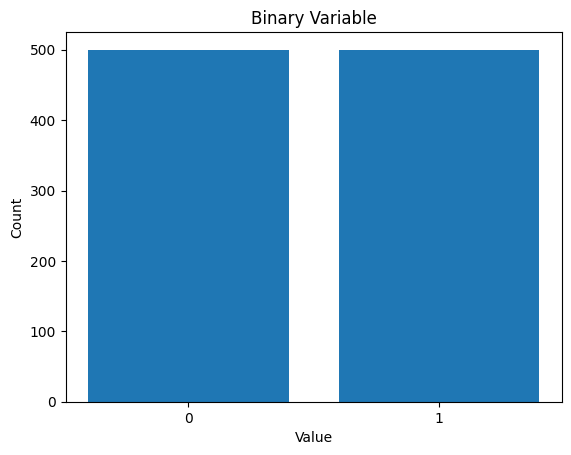

In [1826]:
# Calculate counts of 0 and 1 values
counts = np.bincount(y)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the counts of 0 and 1 as a bar chart
ax.bar(['0', '1'], counts)

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Binary Variable')

# Show the plot
plt.show()

### Spit test-train datasets

In [1827]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [1828]:
X_train.to_csv('/content/drive/MyDrive/Data Mining/data/X_train.csv')
X_test.to_csv('/content/drive/MyDrive/Data Mining/data/X_test.csv')
y_train.to_csv('/content/drive/MyDrive/Data Mining/data/y_train.csv')
y_test.to_csv('/content/drive/MyDrive/Data Mining/data/y_test.csv')